## CNN Tutorial

In [280]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pandas as pd
import random
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [219]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

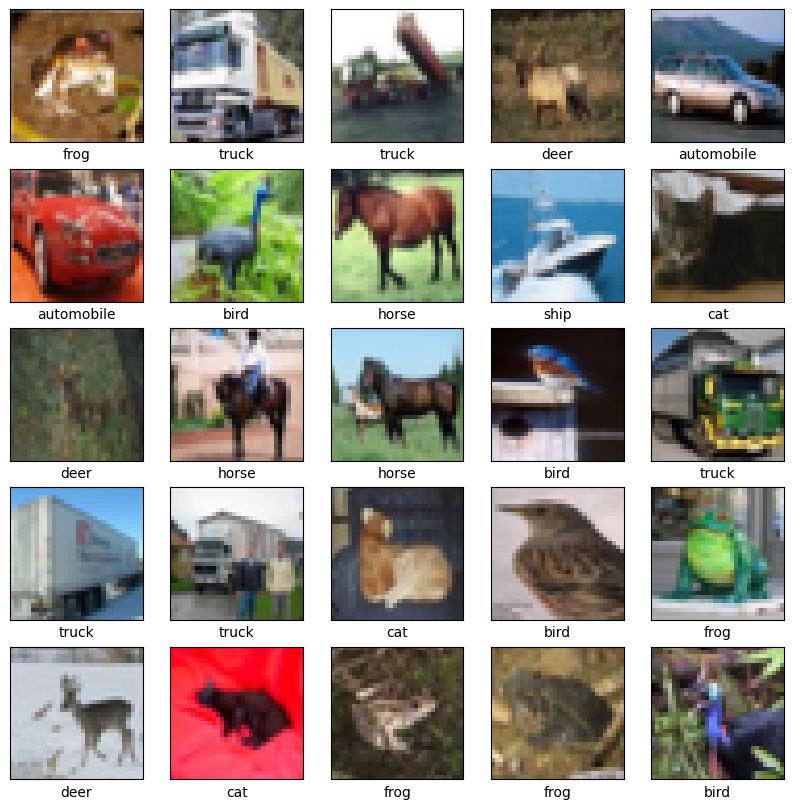

In [220]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [221]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


In [222]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [223]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [224]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [225]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10


2024-11-14 15:09:30.735358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5085 - accuracy: 0.4478

2024-11-14 15:09:48.375005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.5085 - accuracy: 0.4478 - val_loss: 1.2325 - val_accuracy: 0.5679
Epoch 2/10
 706/1563 [============>.................] - ETA: 9s - loss: 1.1763 - accuracy: 0.5831

KeyboardInterrupt: 

In [226]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

NameError: name 'history' is not defined

In [227]:
print(test_acc)

NameError: name 'test_acc' is not defined

In [ ]:
test_labels_pred = model.predict(test_images)

 35/313 [==>...........................] - ETA: 0s

2024-11-13 14:53:55.744373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

test_labels_pred_2 = []

for x in test_labels_pred:
    test_labels_pred_2.append( np.argmax(x) )

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, test_labels_pred_2)

array([[718,  26,  83,  29,   7,   7,   4,  15,  63,  48],
       [ 12, 834,   5,  12,   2,   8,   8,   3,  22,  94],
       [ 50,   5, 654,  75,  40,  85,  39,  31,  10,  11],
       [ 20,   7,  90, 539,  25, 228,  36,  35,   7,  13],
       [ 31,   3, 133, 103, 522,  72,  35,  85,  13,   3],
       [ 10,   1,  62, 141,  26, 680,  16,  56,   4,   4],
       [  8,   6,  63,  93,  45,  51, 712,  10,   5,   7],
       [ 12,   3,  47,  42,  37,  89,   4, 744,   3,  19],
       [ 85,  49,  19,  28,   5,  10,   5,   4, 764,  31],
       [ 21,  76,   9,  26,   1,  16,   5,  10,  23, 813]])

In [ ]:
print(classification_report(test_labels, test_labels_pred_2))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.83      0.83      0.83      1000
           2       0.56      0.65      0.60      1000
           3       0.50      0.54      0.52      1000
           4       0.74      0.52      0.61      1000
           5       0.55      0.68      0.61      1000
           6       0.82      0.71      0.76      1000
           7       0.75      0.74      0.75      1000
           8       0.84      0.76      0.80      1000
           9       0.78      0.81      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



## Convolutional Neural Net on WBC

### Prep Data

In [228]:
df = pd.read_csv("../Data/WBC_Labels.csv")
df["FILENAME"] = df["FILENAME"].str.strip("'")
df.set_index("FILENAME", inplace=True)
df

,FAMILY,TYPE
FILENAME,,
BloodImage_00001.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00002.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00003.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00004.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00005.jpg,GRANULOCYTE,NEUTROPHIL
...,...,...
BloodImage_00405.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00407.jpg,GRANULOCYTE,NEUTROPHIL
BloodImage_00408.jpg,GRANULOCYTE,NEUTROPHIL


In [229]:
df.loc["BloodImage_00001.jpg","FAMILY"]

'GRANULOCYTE'

In [250]:
data = []
for filename in os.listdir("../Data/ProcessedImg/"):
  img = cv.imread("../Data/ProcessedImg/" + filename)
  data.append({"FILENAME":filename, "Data":img[:224,:224], "Family":df.loc[filename,"FAMILY"]})



In [251]:
data[20]

{'FILENAME': 'BloodImage_00048.jpg',
 'Data': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'Family': 'GRANULOCYTE'}

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

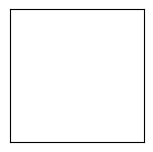

In [252]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i]["Data"])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(data[i]["Family"])
plt.show()

In [253]:
X = [x["Data"] for x in data]
y = [x["Family"] for x in data]


le = LabelEncoder()
y = pd.DataFrame(y)
y = le.fit_transform(y)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

ss = StandardScaler()
X_train = X_train / 255.
X_test = X_test/255. 

/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [254]:
X_train.shape

(276, 224, 224, 3)

### Setup CNN for WBC

In [255]:
model = models.Sequential()
model.add(layers.Conv2D(60, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(60, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(60, (3, 3), activation='relu'))

In [256]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 60)      1680      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 60)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 60)      32460     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 60)        32460     
                                                                 
Total params: 66,600
Trainable params: 66,600
Non-tra

In [257]:
model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(3))

In [258]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 60)      1680      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 60)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 60)      32460     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 60)        32460     
                                                                 
 flatten_4 (Flatten)         (None, 162240)          

In [260]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2024-11-14 15:12:55.409863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9819

2024-11-14 15:12:58.703442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 4s 379ms/step - loss: 0.0899 - accuracy: 0.9819 - val_loss: 1.1315 - val_accuracy: 0.8406
Epoch 2/10
9/9 [==============================] - 3s 352ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 1.3990 - val_accuracy: 0.7971
Epoch 3/10
9/9 [==============================] - 3s 344ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0286 - val_accuracy: 0.8261
Epoch 4/10
9/9 [==============================] - 3s 344ms/step - loss: 9.3198e-04 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy: 0.8261
Epoch 5/10
9/9 [==============================] - 3s 343ms/step - loss: 2.2251e-04 - accuracy: 1.0000 - val_loss: 1.5941 - val_accuracy: 0.8116
Epoch 6/10
9/9 [==============================] - 3s 343ms/step - loss: 7.7745e-05 - accuracy: 1.0000 - val_loss: 1.6783 - val_accuracy: 0.8116
Epoch 7/10
9/9 [==============================] - 3s 344ms/step - loss: 2.8058e-05 - accuracy: 1.0000 - val_loss: 1.7503 - val_accuracy: 0.7971
Epoch 8/10
9/9 

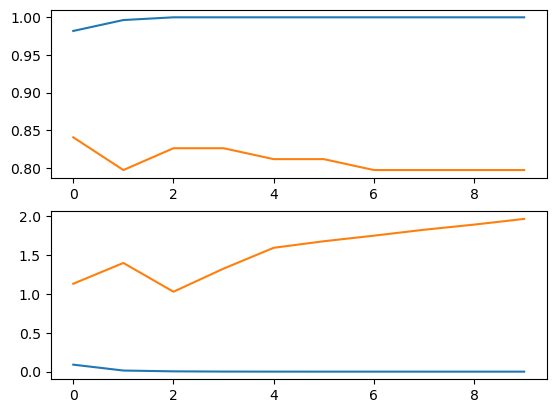

In [261]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history["accuracy"])
ax[0].plot(history.history["val_accuracy"])

ax[1].plot(history.history["loss"])
ax[1].plot(history.history["val_loss"])


In [262]:
y_test_pred = model.predict(X_test)
temp = [1,2,3]
temp.index(max(temp))

y_test_pred = [list(x).index(max(list(x))) for x in y_test_pred]

2/3 [===================>..........] - ETA: 0s

2024-11-14 15:13:34.897649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 98ms/step


### Results of CNN from Scratch

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[57,  0,  1],
       [ 4,  3,  0],
       [ 4,  0,  0]])

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       1.00      0.43      0.60         7
           2       0.00      0.00      0.00         4

    accuracy                           0.87        69
   macro avg       0.63      0.47      0.51        69
weighted avg       0.84      0.87      0.84        69



## Using Pre-trained CNN to Improve Results

### Add Pretrained CNN

In [263]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import backend as K

In [269]:
vgg_model_notop = VGG16(input_shape=(224, 224, 3), include_top=False);

vgg_model_notop.trainable = False
trainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.trainable_weights])
untrainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.non_trainable_weights])

print(trainable_count)
print(untrainable_count)

0.0
14714688


In [270]:
specific_model = models.Sequential()
specific_model.add(vgg_model_notop)
specific_model.add(layers.GlobalAveragePooling2D())
specific_model.add(layers.Dense(32, activation = 'relu'))
specific_model.add(layers.Dense(3, activation = 'softmax'))

specific_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='Adam')

In [271]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_sched_callback = LearningRateScheduler(scheduler)

In [272]:
specific_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_7   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_24 (Dense)            (None, 32)                16416     
                                                                 
 dense_25 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [273]:
history = specific_model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[lr_sched_callback])

Epoch 1/10


/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2024-11-14 15:14:42.374172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 1.3629 - accuracy: 0.1558

2024-11-14 15:14:47.767010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 7s 749ms/step - loss: 1.3629 - accuracy: 0.1558 - val_loss: 0.8619 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - 6s 710ms/step - loss: 0.7118 - accuracy: 0.8442 - val_loss: 0.5905 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - 6s 713ms/step - loss: 0.5574 - accuracy: 0.8442 - val_loss: 0.5444 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 4/10
9/9 [==============================] - 6s 706ms/step - loss: 0.5315 - accuracy: 0.8442 - val_loss: 0.5396 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 5/10
9/9 [==============================] - 6s 726ms/step - loss: 0.5295 - accuracy: 0.8442 - val_loss: 0.5359 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 6/10
9/9 [==============================] - 6s 717ms/step - loss: 0.5226 - accuracy: 0.8442 - val_loss: 0.5288 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 7/10
9/9 [==============================] - 6s 728ms/step - loss: 0.5148 - accuracy: 0.

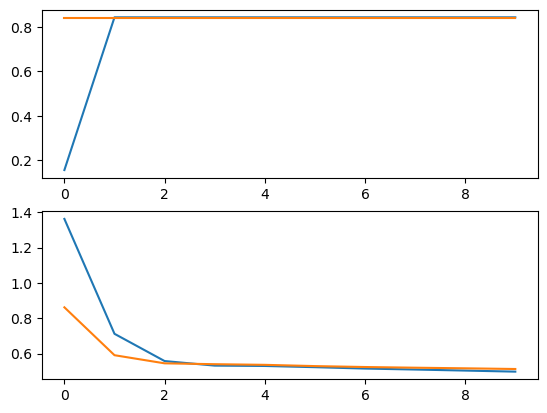

In [274]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history["accuracy"])
ax[0].plot(history.history["val_accuracy"])

ax[1].plot(history.history["loss"])
ax[1].plot(history.history["val_loss"])

In [275]:
y_test_pred = specific_model.predict(X_test)

y_test_pred = [list(x).index(max(list(x))) for x in y_test_pred]

2024-11-14 15:15:53.148411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 580ms/step


### Results of Pretrained CNN

In [278]:

confusion_matrix(y_test, y_test_pred)

array([[58,  0,  0],
       [ 7,  0,  0],
       [ 4,  0,  0]])

In [281]:
print(classification_report(y_test, y_test_pred));

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        58
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4

    accuracy                           0.84        69
   macro avg       0.28      0.33      0.30        69
weighted avg       0.71      0.84      0.77        69



/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Augmenting Data and Re-Run

In [581]:
from tensorflow.keras.layers import Resizing, RandomRotation, RandomZoom, RandomTranslation
from tensorflow.data import AUTOTUNE
from tensorflow.keras.applications.vgg16 import preprocess_input



In [582]:
resize_fn = Resizing(224, 224)
random_rot = RandomRotation(0.1)
random_translate = RandomTranslation(width_factor=0.1, height_factor=0.0)
random_scale = RandomZoom(height_factor=0.1)

def preprocess_augmentor(x):
    x_aug = random_scale(random_translate(random_rot(resize_fn(x))))

    x_aug = preprocess_input(x_aug)

    return x_aug

In [284]:
preprocess_augmentor(X_train[0])

NotFoundError: Exception encountered when calling layer "random_rotation" (type RandomRotation).

No registered 'RngReadAndSkip' OpKernel for 'GPU' devices compatible with node {{node RngReadAndSkip}}
	.  Registered:  device='XLA_CPU_JIT'
  device='CPU'
 [Op:RngReadAndSkip]

Call arguments received by layer "random_rotation" (type RandomRotation):
  • inputs=tf.Tensor(shape=(224, 224, 3), dtype=float32)
  • training=True

NotFoundError: Exception encountered when calling layer "random_rotation" (type RandomRotation).

No registered 'RngReadAndSkip' OpKernel for 'GPU' devices compatible with node {{node RngReadAndSkip}}
	.  Registered:  device='XLA_CPU_JIT'
  device='CPU'
 [Op:RngReadAndSkip]

Call arguments received by layer "random_rotation" (type RandomRotation):
  • inputs=tf.Tensor(shape=(224, 224, 3), dtype=float32)
  • training=True

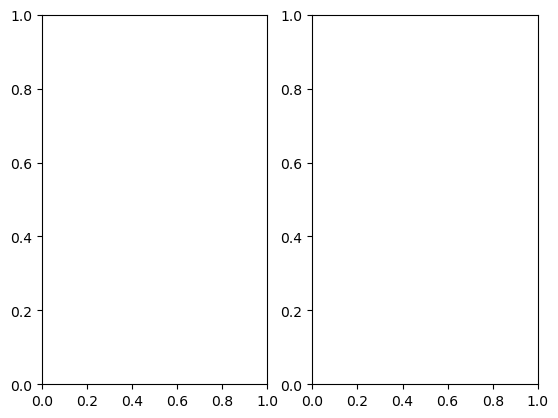

In [285]:
fig, ax = plt.subplots(1,2)

temp1 = resize_fn(X_train[1])
with tf.device('/cpu:1'):
  temp2 = random_rot(resize_fn(X_train[1]))
ax[0].imshow(temp1)
ax[1].imshow(temp2)

In [ ]:
#Glbal average pooling 2D (flattening layer)

### Add Additional Cells (LYMPHOCYTE, MONOCYTE) to Data/Synthetic

In [583]:
def rotate_image(image, angle):
  
  
  rot_mat = cv.getRotationMatrix2D( (int(image.shape[0]/2), int(image.shape[1]/2)), angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result

def zoom(img, zoom_factor=2):
  return cv.resize(img, None, fx=zoom_factor, fy=zoom_factor)

def random_transform(img):
  img = rotate_image(img, random.randint(-180,180))
  img = zoom(img, zoom_factor=random.randint(90,110)/100)
  y_c = int(img.shape[0]/2)
  x_c = int(img.shape[1]/2)
  return cv.resize(img[y_c-100:y_c+100,x_c-100:x_c+100], (224,224), interpolation=cv.INTER_LINEAR)

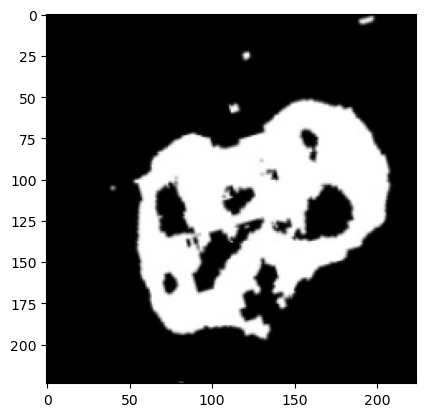

In [584]:
plt.imshow(random_transform(X[0]))

In [585]:
random_transform(X_test[0])

KeyError: 0

In [586]:
temp = zoom(X_test[15], 1)
y_c = int(temp.shape[0]/2)
x_c = int(temp.shape[1]/2)
plt.imshow(temp[y_c-112:y_c+112, x_c-112:x_c+112])


KeyError: 15

In [587]:
df = pd.read_csv("../Data/WBC_Labels.csv")
df = df[(df["FAMILY"] == "LYMPHOCYTE") | (df["FAMILY"] == "MONOCYTE")]
df["FAMILY"].value_counts()
df["FILENAME"] = df["FILENAME"].str.strip("'")

In [588]:
cv.imread("../Data//BloodImage_00015.jpg")

[ WARN:0@10517.500] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../Data//BloodImage_00015.jpg'): can't open/read file: check file path/integrity


In [589]:
for x in df.values:
    for i in range(0,10):
        img = cv.imread("../Data/ProcessedImg/" + x[0])
        img = random_transform(img)
        cv.imwrite("../Data/Synthetic/" + str(x[0][:-4]) + "-" + str(i) + ".jpg", img)

## Try CNN with Synthetic Data

### Read in Synthetic Data

In [813]:
!rm ../Data/Synthetic/*

In [814]:
df = pd.read_csv("../Data/WBC_Labels.csv")
df["FILENAME"] = df["FILENAME"].str.strip("'")
df = df.set_index("FILENAME")

data = []
for filename in os.listdir("../Data/ProcessedImg/"):
  img = cv.imread("../Data/ProcessedImg/" + filename)
  img = np.array(img)

  data.append({"FILENAME":filename, "Data":img[:224,:224], "Family":df.loc[filename,"FAMILY"]})


In [815]:
X = [x["Data"] for x in data]
X = np.array(X)

y = [x["Family"] for x in data]
y = np.array(y)
y.shape


(345,)

In [816]:
X.shape

(345, 224, 224, 3)

In [817]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [818]:
X_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [819]:
type(y_train)

numpy.ndarray

In [820]:
for i in range(0, len(y_train)):
    if (y_train[i] == "LYMPHOCYTE"):
        for j in range(0,10):
          img = random_transform(X_train[i])
          cv.imwrite("../Data/Synthetic/lymphocyte" + str(i) + "-" + str(j) + ".jpg", img)
    if (y_train[i] == "MONOCYTE"):
        for j in range(0,10):
          img = random_transform(X_train[i])
          cv.imwrite("../Data/Synthetic/monocyte" + str(i) + "-" + str(j) + ".jpg", img)
     

In [744]:
# monocytes = y_train[y_train == "MONOCYTE"].index
# lymphocytes = y_train[y_train == "LYMPHOCYTE"].index

# for i in monocytes:
#     for j in range(0,10):
#       img = random_transform(X_train[i])
#       cv.imwrite("../Data/Synthetic/monocyte" + str(i) + "-" + str(j) + ".jpg", img)

# for i in lymphocytes:
#    for j in range(0,10):
#       img = random_transform(X_train[i])
#       cv.imwrite("../Data/Synthetic/lymphocyte" + str(i) + "-" + str(j) + ".jpg", img)

In [821]:
synthetic_data = []
for filename in os.listdir("../Data/Synthetic/"):
    if filename != ".DS_Store":
      img = cv.imread("../Data/Synthetic/" + filename)
      if filename[:3] == "lym":
        cell_type = "LYMPHOCYTE"
      else:
        cell_type = "MONOCYTE"
      print(filename)
      print(filename +"\t" + str(img.shape))
      synthetic_data.append({"FILENAME":filename, "Data":img, "Family":cell_type})


monocyte137-0.jpg
monocyte137-0.jpg	(224, 224, 3)
lymphocyte216-6.jpg
lymphocyte216-6.jpg	(224, 224, 3)
lymphocyte52-6.jpg
lymphocyte52-6.jpg	(224, 224, 3)
lymphocyte268-0.jpg
lymphocyte268-0.jpg	(224, 224, 3)
lymphocyte185-8.jpg
lymphocyte185-8.jpg	(224, 224, 3)
lymphocyte209-1.jpg
lymphocyte209-1.jpg	(224, 224, 3)
lymphocyte133-7.jpg
lymphocyte133-7.jpg	(224, 224, 3)
lymphocyte128-4.jpg
lymphocyte128-4.jpg	(224, 224, 3)
lymphocyte190-4.jpg
lymphocyte190-4.jpg	(224, 224, 3)
lymphocyte100-8.jpg
lymphocyte100-8.jpg	(224, 224, 3)
monocyte131-6.jpg
monocyte131-6.jpg	(224, 224, 3)
lymphocyte236-3.jpg
lymphocyte236-3.jpg	(224, 224, 3)
monocyte275-6.jpg
monocyte275-6.jpg	(224, 224, 3)
lymphocyte248-5.jpg
lymphocyte248-5.jpg	(224, 224, 3)
lymphocyte248-4.jpg
lymphocyte248-4.jpg	(224, 224, 3)
monocyte275-7.jpg
monocyte275-7.jpg	(224, 224, 3)
lymphocyte236-2.jpg
lymphocyte236-2.jpg	(224, 224, 3)
monocyte131-7.jpg
monocyte131-7.jpg	(224, 224, 3)
lymphocyte100-9.jpg
lymphocyte100-9.jpg	(224, 224,

In [822]:
temp = [x["Data"] for x in synthetic_data]
X_synth = np.array(temp)

In [823]:
X_synth.shape

(430, 224, 224, 3)

In [824]:
X_train.shape


(276, 224, 224, 3)

In [825]:
X_train = np.concatenate((X_train, X_synth))


In [826]:
y_synth = [x["Family"] for x in synthetic_data]
y_synth = np.array(y_synth)
y_train = np.concatenate((y_train, y_synth))

In [827]:
y_train

array(['GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'LYMPHOCYTE', 'MONOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'LYMPHOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE', 'GRANULOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'MONOCYTE', 'GRANULOCYTE',
       'LYMPHOCYTE', 'MONOCYTE', 'GRANULOCYTE', 'LYMPHOCYTE',
       'GRANULOCYTE', 'GRANULOCYTE', 'MONOCYTE', 'GRANULOCYTE',
       'GRA

In [828]:
y_train = pd.get_dummies(y_train)


In [829]:
y_test = pd.get_dummies(y_test)

### Create and Run CNN

In [908]:
vgg_model_notop = VGG16(input_shape=(224, 224, 3), include_top=False);

vgg_model_notop.trainable = False
trainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.trainable_weights])
untrainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.non_trainable_weights])

print(trainable_count)
print(untrainable_count)

0.0
14714688


In [831]:
specific_model = models.Sequential()
specific_model.add(vgg_model_notop)
specific_model.add(layers.GlobalAveragePooling2D())
specific_model.add(layers.Dense(32, activation = 'relu'))
specific_model.add(layers.Dense(3, activation = 'softmax'))

specific_model.compile(loss=tf.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='Adam')

In [832]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [833]:
history = specific_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


2024-11-14 18:13:08.756988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 1.8895 - accuracy: 0.5510

2024-11-14 18:13:22.601191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 15s 650ms/step - loss: 1.8895 - accuracy: 0.5510 - val_loss: 0.9727 - val_accuracy: 0.5797
Epoch 2/30
23/23 [==============================] - 14s 605ms/step - loss: 0.4161 - accuracy: 0.8470 - val_loss: 0.4617 - val_accuracy: 0.8696
Epoch 3/30
23/23 [==============================] - 14s 599ms/step - loss: 0.2291 - accuracy: 0.9136 - val_loss: 0.4926 - val_accuracy: 0.8551
Epoch 4/30
23/23 [==============================] - 14s 599ms/step - loss: 0.1697 - accuracy: 0.9419 - val_loss: 0.4977 - val_accuracy: 0.8261
Epoch 5/30
23/23 [==============================] - 14s 605ms/step - loss: 0.1360 - accuracy: 0.9561 - val_loss: 0.4978 - val_accuracy: 0.8261
Epoch 6/30
23/23 [==============================] - 14s 612ms/step - loss: 0.1121 - accuracy: 0.9674 - val_loss: 0.5077 - val_accuracy: 0.8261
Epoch 7/30
23/23 [==============================] - 14s 629ms/step - loss: 0.0899 - accuracy: 0.9731 - val_loss: 0.4852 - val_accuracy: 0.8551
Epoch 8/30

In [834]:
y_test_pred = specific_model.predict(X_test)

2024-11-14 18:20:53.728503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 570ms/step


In [835]:
y_test_pred_2 = [list(x).index(x.max()) for x in y_test_pred]

In [836]:
y_test_2 =[list(x).index(x.max()) for x in y_test.values]


In [839]:
confusion_matrix(y_test_2, y_test_pred_2)

array([[55,  1,  2],
       [ 3,  3,  0],
       [ 3,  0,  2]])

In [840]:
print(classification_report(y_test_2, y_test_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.75      0.50      0.60         6
           2       0.50      0.40      0.44         5

    accuracy                           0.87        69
   macro avg       0.72      0.62      0.66        69
weighted avg       0.86      0.87      0.86        69



In [841]:
y_train_pred = specific_model.predict(X_train)

23/23 [==============================] - 13s 597ms/step


In [842]:
y_train_pred_2 = [list(x).index(x.max()) for x in y_train_pred]

In [843]:
y_train_2 =[list(x).index(x.max()) for x in y_train.values]

In [844]:
confusion_matrix(y_train_2, y_train_pred_2)

array([[233,   0,   0],
       [  0, 297,   0],
       [  0,   0, 176]])

In [846]:
print(classification_report(y_train_2, y_train_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       176

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



## Try Unfreezing Steps and Fine-Tuning the Training

In [847]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [849]:
vgg_model_notop.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [857]:
vgg_model_notop.get_layer("block5_conv1").trainable = True
vgg_model_notop.get_layer("block5_conv2").trainable = True
vgg_model_notop.get_layer("block5_conv3").trainable = True

In [861]:
vgg_model_notop.get_layer("block4_conv1").trainable

False

In [863]:
vgg_model_notop.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [864]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [869]:
specific_model.get_layer("vgg16").get_layer("block5_conv1").trainable

True

In [870]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [871]:
specific_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
23/23 [==============================] - 14s 616ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.6018 - val_accuracy: 0.8986
Epoch 2/5
23/23 [==============================] - 14s 597ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.6604 - val_accuracy: 0.8841
Epoch 3/5
23/23 [==============================] - 14s 601ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.6293 - val_accuracy: 0.8551
Epoch 4/5
23/23 [==============================] - 14s 598ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.6484 - val_accuracy: 0.8841
Epoch 5/5
23/23 [==============================] - 14s 599ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.6266 - val_accuracy: 0.8551


In [872]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [873]:
specific_model.get_layer("dense_50").trainable = False

In [874]:
specific_model.get_layer("dense_51").trainable = False

In [875]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 0
Non-trainable params: 14,731,203
_________________________________________________________________


In [876]:
specific_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
23/23 [==============================] - 14s 603ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.6668 - val_accuracy: 0.8841
Epoch 2/5
23/23 [==============================] - 14s 601ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.6365 - val_accuracy: 0.8696
Epoch 3/5
23/23 [==============================] - 14s 598ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6606 - val_accuracy: 0.8696
Epoch 4/5
23/23 [==============================] - 14s 599ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.6518 - val_accuracy: 0.8696
Epoch 5/5
23/23 [==============================] - 14s 598ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6600 - val_accuracy: 0.8551


In [878]:
specific_model.get_layer("vgg16").get_layer("block5_conv3").trainable=True

In [879]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 0
Non-trainable params: 14,731,203
_________________________________________________________________


In [881]:
[layer.trainable for layer in specific_model.layers[0].layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False]

In [884]:
for layer in specific_model.layers[0].layers[-2:]:
    layer.trainable=True

In [885]:
[layer.trainable for layer in specific_model.layers[0].layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

In [886]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 0
Non-trainable params: 14,731,203
_________________________________________________________________


In [891]:
[x.trainable for x in specific_model.layers[0].layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

In [892]:
specific_model.layers[0].layers[0].trainable = True

In [893]:
specific_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_20  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_50 (Dense)            (None, 32)                16416     
                                                                 
 dense_51 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 0
Non-trainable params: 14,731,203
_________________________________________________________________


In [894]:
[x.trainable for x in specific_model.layers[0].layers]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

In [901]:
specific_model.layers[2].trainable = False

In [904]:
specific_model.layers[0].layers[-2].trainable = True

In [906]:
specific_model.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [919]:

vgg_model_notop.trainable=False
trainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.trainable_weights])
trainable_count

0.0

## Keep Color When Centering Images; Setup for Img Gen Tool

### For each color image, center and save to respective folder

In [937]:
!ls ../

Data           README.md      Sandbox        index.ipynb    pixels_fam.csv


In [957]:
def process_color(filename, cell_type):
  img = cv.imread("../Data/RawImgs/" + filename)
  plt.imshow(img)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  low_color = np.array([55, 55, 152])
  high_color = np.array([166, 153, 255])
  img2 = cv.cvtColor(img, cv.COLOR_RGB2HSV)
  mask = cv.inRange(img2, low_color, high_color)

  contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  contour = max(contours, key=cv.contourArea)

  M = cv.moments(contour)
  cX = int(M["m10"]/M["m00"])
  cY = int(M["m01"]/M["m00"])


  # Define the translation matrix
  tx = 112-cX  # Translation in x direction
  ty = 112-cY # Translation in y direction
  M = np.float32([[1, 0, tx], [0, 1, ty]])

  # Apply the translation
  translated_image = cv.warpAffine(img, M, (224, 224))
  #resized_image = cv.resize(translated_image, (60, 60))
  #plt.imshow(translated_image)
  if cell_type == "BASOPHIL":
    cv.imwrite("../Data/ProcessedImg_Color/Types/BASOPHIL/" + filename, translated_image)
  
  if cell_type == "EOSINOPHIL":
    cv.imwrite("../Data/ProcessedImg_Color/Types/EOSINOPHIL/" + filename, translated_image)
 
  if cell_type == "LYMPHOCYTE":
    cv.imwrite("../Data/ProcessedImg_Color/Types/LYMPHOCYTE/" + filename, translated_image)

  if cell_type == "MONOCYTE":
    cv.imwrite("../Data/ProcessedImg_Color/Types/MONOCYTE/" + filename, translated_image)

  if cell_type == "NEUTROPHIL":
    cv.imwrite("../Data/ProcessedImg_Color/Types/NEUTROPHIL/" + filename, translated_image)




NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
BASOPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
MONOCYTE
NEUTROPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
LYMPHOCYTE
LYMPHOCYTE
NEUTROPHIL
EOSINOPHIL
NEUTROPHIL
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
EOSINOPHIL
LYMPHOCYTE
LYMPHOCYTE
NEUTROPHIL
MONOCYTE
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
LYMPHOCYTE
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
LYMPHOCYTE
LYMPHOCYTE
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
EOSINOPHIL
LYMPHOCYTE
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
NEUTROPHIL
MONOCYTE
NEUTROPHIL
NEUTROPHIL
EOSINOPHIL
LYMPHOCYTE
EOSINOPHIL
NEUTROPHIL
NEUTROPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
NEUTROPHIL
LYMPHOCYTE
EOSINOPHIL
EOSINOPHIL
MONOCYTE
NEUTROPHIL
EOSINOPHIL
EOSINOPHIL
EOSINOPHIL
MONOCYTE


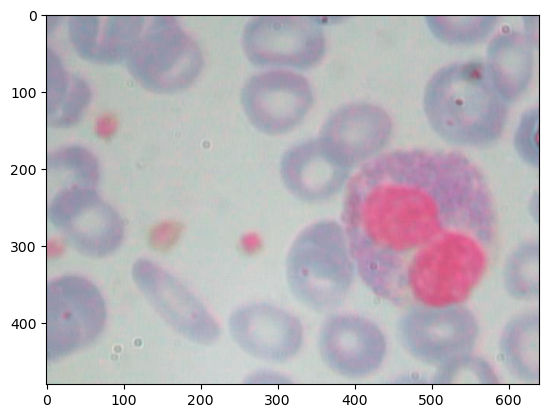

In [958]:
df = pd.read_csv("../Data/WBC_Labels.csv")
df["FILENAME"] = df["FILENAME"].str.strip("'")

for x in df.values:
    print(x[2])
    process_color(x[0], x[2])

### Read in using Img Gen System

In [961]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = 224
BATCH_SIZE = 32

TRAIN_PATH = "../Data/ProcessedImg_Color/Types"
#TEST_PATH = "Data/Test-A"

# ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
data_gen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)


train_gen = data_gen.flow_from_directory(directory = TRAIN_PATH,subset='training',batch_size = BATCH_SIZE,shuffle = True,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))

valid_gen = data_gen.flow_from_directory(directory = TRAIN_PATH,subset='validation',batch_size = BATCH_SIZE,shuffle = False,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))

#test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(directory = TEST_PATH,batch_size = BATCH_SIZE,shuffle = False,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))


Found 278 images belonging to 5 classes.
Found 67 images belonging to 5 classes.


### Run with VGG16 Net

In [969]:
vgg_model_notop = VGG16(input_shape=(224, 224, 3), include_top=False);

vgg_model_notop.trainable = False
trainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.trainable_weights])
untrainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.non_trainable_weights])

print(trainable_count)
print(untrainable_count)

0.0
14714688


In [ ]:
from tensorflow import keras 

specific_model = models.Sequential()
specific_model.add(vgg_model_notop)
specific_model.add(layers.GlobalAveragePooling2D())
specific_model.add(layers.Dense(32, activation = 'relu'))
specific_model.add(layers.Dropout(0.2))
specific_model.add(layers.Dense(5, activation = 'softmax'))

adam = keras.optimizers.Adam()

specific_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
specific_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_27  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_64 (Dense)            (None, 32)                16416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 5)                 165       
                                                                 
Total params: 14,731,269
Trainable params: 16,581
Non-trainable params: 14,714,688
____________________________________

In [982]:
history = specific_model.fit(train_gen, validation_data=valid_gen, epochs=200)

Epoch 1/200
9/9 [==============================] - 7s 791ms/step - loss: 1.0385 - accuracy: 0.5827 - val_loss: 0.9782 - val_accuracy: 0.6119
Epoch 2/200
9/9 [==============================] - 7s 734ms/step - loss: 1.0734 - accuracy: 0.5899 - val_loss: 0.9717 - val_accuracy: 0.6119
Epoch 3/200
9/9 [==============================] - 7s 736ms/step - loss: 1.0652 - accuracy: 0.5899 - val_loss: 0.9791 - val_accuracy: 0.6119
Epoch 4/200
9/9 [==============================] - 7s 742ms/step - loss: 1.0538 - accuracy: 0.5863 - val_loss: 0.9751 - val_accuracy: 0.6119
Epoch 5/200
9/9 [==============================] - 7s 744ms/step - loss: 1.0529 - accuracy: 0.5899 - val_loss: 0.9688 - val_accuracy: 0.6119
Epoch 6/200
9/9 [==============================] - 7s 759ms/step - loss: 1.0523 - accuracy: 0.5863 - val_loss: 0.9766 - val_accuracy: 0.5970
Epoch 7/200
9/9 [==============================] - 7s 828ms/step - loss: 1.0369 - accuracy: 0.5935 - val_loss: 0.9830 - val_accuracy: 0.6119
Epoch 8/200
9

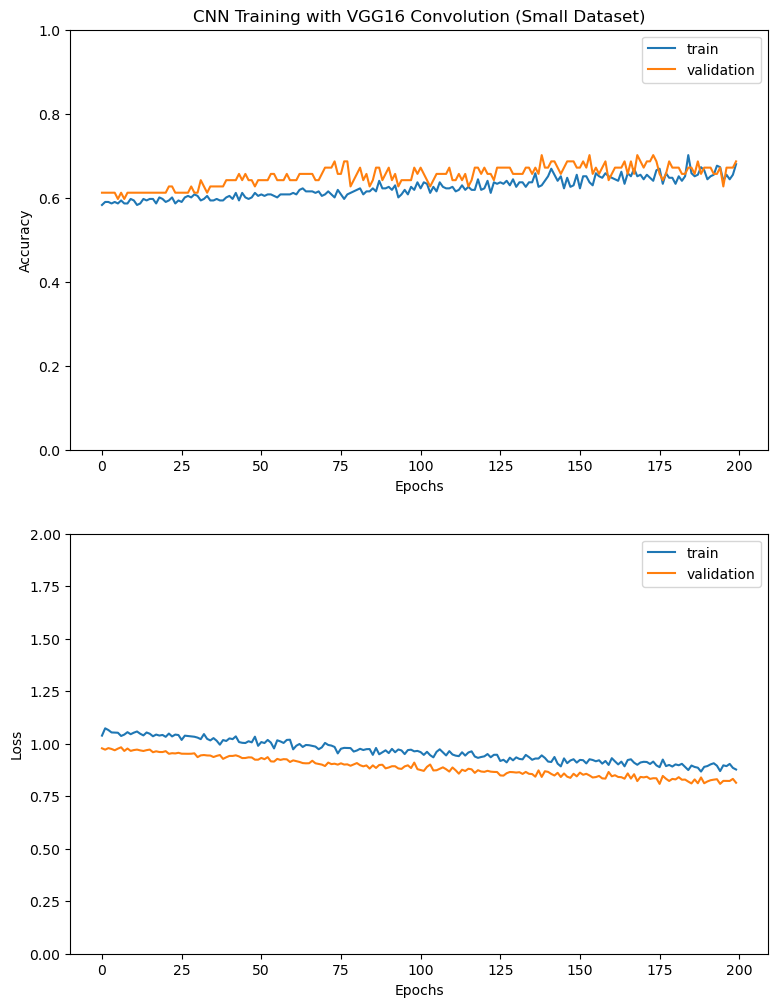

In [999]:
fig, ax = plt.subplots(2,1, figsize=(9,12))
ax[0].plot(history.history["accuracy"], label="train")
ax[0].plot(history.history["val_accuracy"], label="validation")
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()
ax[0].set_title("CNN Training with VGG16 Convolution (Small Dataset)")

ax[1].plot(history.history["loss"], label="train")
ax[1].plot(history.history["val_loss"], label="validation")
ax[1].set_ylim(0,2)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

fig.savefig("../Presentation/images/accuracy_old_data.png")

In [981]:
specific_model.predict(train_gen)

2024-11-15 07:05:41.199195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 6s 642ms/step


array([[0.02619997, 0.26184282, 0.12168244, 0.05661299, 0.5336618 ],
       [0.02328474, 0.238704  , 0.09484877, 0.04591561, 0.5972468 ],
       [0.01603209, 0.20045803, 0.07814919, 0.02993184, 0.67542887],
       ...,
       [0.02190041, 0.3065944 , 0.11295389, 0.03886035, 0.519691  ],
       [0.01820203, 0.22053795, 0.08534621, 0.03220613, 0.6437077 ],
       [0.02523107, 0.26349458, 0.12374392, 0.05360856, 0.5339219 ]],
      dtype=float32)

In [1002]:
import seaborn as sns

predicted_classes = np.argmax(specific_model.predict(valid_gen), axis=1)

confusionmatrix = confusion_matrix(valid_gen.classes, predicted_classes)
print(confusionmatrix)
print(classification_report(valid_gen.classes, predicted_classes))


3/3 [==============================] - 1s 591ms/step
[[ 2  4  0 11]
 [ 1  2  0  3]
 [ 1  0  0  3]
 [ 1  0  0 39]]
              precision    recall  f1-score   support

           1       0.40      0.12      0.18        17
           2       0.33      0.33      0.33         6
           3       0.00      0.00      0.00         4
           4       0.70      0.97      0.81        40

    accuracy                           0.64        67
   macro avg       0.36      0.36      0.33        67
weighted avg       0.55      0.64      0.56        67



/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jgoett/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Try with Kaggle Data Set/Same Neural Net

In [1018]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

TRAIN_PATH = "../Data/Kaggle/Train"
#TEST_PATH = "Data/Test-A"

# ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
data_gen2 = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)


train_gen2 = data_gen2.flow_from_directory(directory = TRAIN_PATH,subset='training',batch_size = BATCH_SIZE,shuffle = True,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))

valid_gen2 = data_gen2.flow_from_directory(directory = TRAIN_PATH,subset='validation',batch_size = BATCH_SIZE,shuffle = False,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))

#test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(directory = TEST_PATH,batch_size = BATCH_SIZE,shuffle = False,class_mode = 'categorical',target_size = (IMAGE_SIZE, IMAGE_SIZE))


Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.


In [1019]:
vgg_model_notop = VGG16(input_shape=(224, 224, 3), include_top=False);

vgg_model_notop.trainable = False
trainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.trainable_weights])
untrainable_count = np.sum([K.count_params(w) for w in vgg_model_notop.non_trainable_weights])

print(trainable_count)
print(untrainable_count)

0.0
14714688


In [1020]:
from tensorflow import keras 

specific_model2 = models.Sequential()
specific_model2.add(vgg_model_notop)
specific_model2.add(layers.GlobalAveragePooling2D())
specific_model2.add(layers.Dense(32, activation = 'relu'))
specific_model2.add(layers.Dropout(0.2))
specific_model2.add(layers.Dense(5, activation = 'softmax'))

adam = keras.optimizers.Adam()

specific_model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [1021]:
history2 = specific_model2.fit(train_gen2, validation_data=valid_gen2, epochs=10)

Epoch 1/10


2024-11-15 11:21:52.181469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.6676

2024-11-15 11:24:20.761824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - 187s 731ms/step - loss: 0.9554 - accuracy: 0.6676 - val_loss: 0.8682 - val_accuracy: 0.7068
Epoch 2/10
255/255 [==============================] - 235s 922ms/step - loss: 0.7391 - accuracy: 0.7604 - val_loss: 0.7927 - val_accuracy: 0.7447
Epoch 3/10
255/255 [==============================] - 207s 813ms/step - loss: 0.6408 - accuracy: 0.7864 - val_loss: 0.7797 - val_accuracy: 0.7496
Epoch 4/10
255/255 [==============================] - 215s 843ms/step - loss: 0.5734 - accuracy: 0.8009 - val_loss: 0.7088 - val_accuracy: 0.7668
Epoch 5/10
255/255 [==============================] - 233s 914ms/step - loss: 0.5341 - accuracy: 0.8115 - val_loss: 0.7123 - val_accuracy: 0.7644
Epoch 6/10
255/255 [==============================] - 230s 900ms/step - loss: 0.5061 - accuracy: 0.8188 - val_loss: 0.6690 - val_accuracy: 0.7732
Epoch 7/10
255/255 [==============================] - 224s 879ms/step - loss: 0.4718 - accuracy: 0.8337 - val_loss: 0.6584 - val_accura

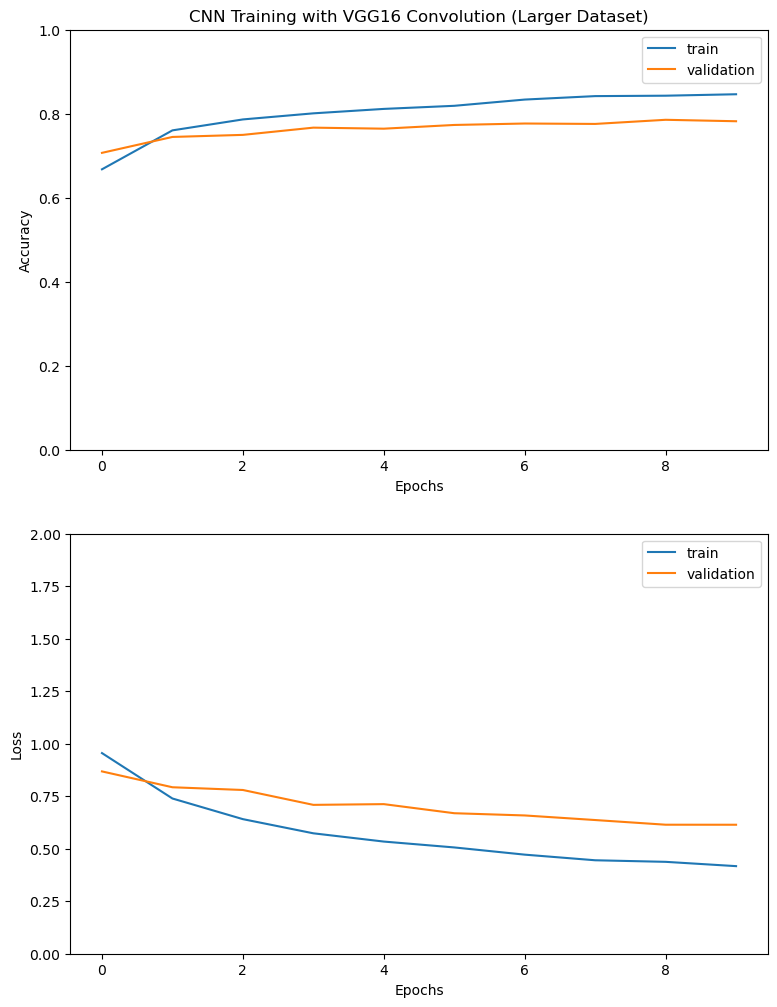

In [1023]:
fig, ax = plt.subplots(2,1, figsize=(9,12))
ax[0].plot(history2.history["accuracy"], label="train")
ax[0].plot(history2.history["val_accuracy"], label="validation")
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()
ax[0].set_title("CNN Training with VGG16 Convolution (Larger Dataset)")

ax[1].plot(history2.history["loss"], label="train")
ax[1].plot(history2.history["val_loss"], label="validation")
ax[1].set_ylim(0,2)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

fig.savefig("../Presentation/images/accuracy_larger_data.png")

64/64 [==============================] - 37s 578ms/step
[[  42    0    0    0    0]
 [   0   19   31   22   76]
 [   1   10  359    7  108]
 [   1   11   22   21   57]
 [   1    2   64   21 1158]]


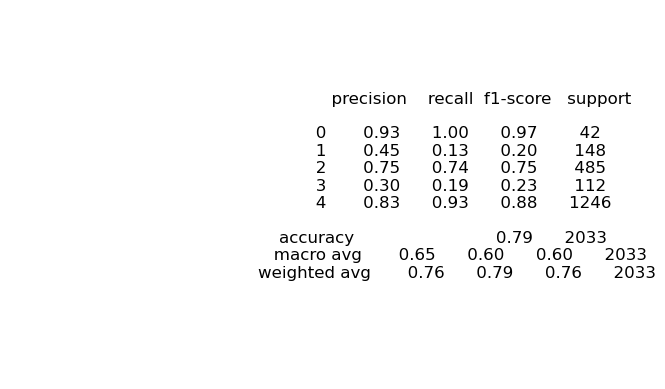

In [1034]:
predicted_classes2 = np.argmax(specific_model2.predict(valid_gen2), axis=1)

confusionmatrix2 = confusion_matrix(valid_gen2.classes, predicted_classes2)
print(confusionmatrix2)
report = classification_report(valid_gen2.classes, predicted_classes2)

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ... (your classification code)

# Generate the classification report

# Create a figure and axes
fig, ax = plt.subplots()

# Display the report as text
ax.text(0.5, 0.5, report, ha='left', va='center', fontsize=12)
ax.axis('off')

# Save the figure as an image
plt.savefig('../Presentation/images/classification_report_cnn.png')

In [1017]:
(.17+.75 + .37)/2

0.645

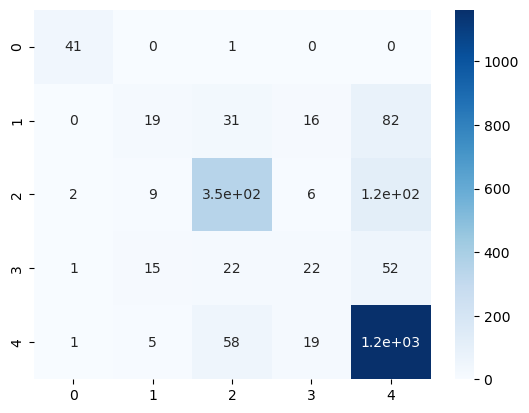

In [1028]:
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix2, cmap="Blues", annot=True, cbar=True, ax=ax)
fig.savefig("../Presentation/images/confusion_matrix_CNN.png")